# テンプレートマッチングによるパターン検出

本チュートリアルでは，テンプレートマッチングを用いて画像中のパターンを検出します．
0. [Google Colaboratoryの基本的な使い方](#scrollTo=ToMgdzHztsaD)
1. [画像処理の基本](#scrollTo=UbIM7kK8dEPm)
2. [テンプレートマッチングによるパターン検出](#scrollTo=82CpAZRNrnX1)

## 0. Google Colaboratoryの基本的な使い方

　まず，下記のプログラムを見てください．「a」という変数に1を代入したあと，「a」という変数をPrintしているプログラムになります．このプログラムを実行すると「1」と表示されます．

In [ ]:
a = 1
print(a)

1


　次に，下記のプログラムを見てください．「b」という変数に先程の「a」という変数を2倍したものを代入したあと，「b」という変数をPrintしているプログラムになります．このプログラムを実行すると「2」と表示されます．

　このように，Google Colaboratoryでは，このファイル内で記述したプログラムは全て共有されます．あとは，基本的に普通のPythonのプログラミングと同じになります．

In [ ]:
b = a * 2
print(b)

2


## 1. 画像処理の基本

ここでは，画像処理の基本的なプログラム方法について説明します．画像ファイルを読み込んで，画面に表示してみましょう．下記のプログラムで，Google Colaboratory上に画像をアップロードすることができます．まず，本チュートリアルで用いる「lenna.bmp」をアップロードしましょう．

In [ ]:
from google.colab import files                    # ファイルを読み込むためのライブラリをインポート．

uploaded_file1 = files.upload()                   # 選択したファイルをアップロード．
uploaded_file_name1 = next(iter(uploaded_file1))  # アップロードしたファイルの名前を取得．
print(uploaded_file_name1)                        # ファイル名の表示．

Saving lenna.bmp to lenna.bmp
lenna.bmp


下記のプログラムで，上のコードブロックでアップロードしたファイルを画像データとして読み込み，描画することができます．

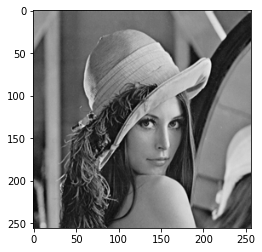

In [ ]:
import cv2                                        # 画像用のライブラリをインポート．
from matplotlib import pyplot as plt              # 描画用のライブラリをインポート．

img = cv2.imread(uploaded_file_name1, 0)          # 画像ファイルを読み込む．
plt.imshow(img, cmap = "gray")                    # 読み込んだ画像の描画．

読み込んだ画像の構成を確認してみましょう．下記のプログラムで，画像のサイズ，画像の[0, 0]の輝度値(画素値)，画像の全ピクセルの輝度値(画素値)をPrintすることができます．これらの情報を駆使してチュートリアルを進めていきます．

In [ ]:
print("画像のサイズ\t\t：\t{0}\n".format(img.shape))    # 画像のサイズ．
print("画像[0, 0]の濃度値\t：\t{0}\n".format(img[0,0])) # 画像の[0, 0]の輝度値(画素値)．
print("画像全ピクセルの濃度値\t：\n{0}\n".format(img))  # 全ピクセルの輝度値(画素値)．

画像のサイズ		：	(256, 256)

画像[0, 0]の濃度値	：	161

画像全ピクセルの濃度値	：
[[161 161 160 ... 165 170 152]
 [161 161 161 ... 166 170 153]
 [161 160 157 ... 167 168 153]
 ...
 [ 52  58  56 ...  77  89  88]
 [ 49  52  53 ...  88  98  97]
 [ 47  56  57 ...  97 100 105]]



次に，本チュートリアルで用いるテンプレート画像のファイルである「lenna_face.bmp」をアップロードしましょう．

In [ ]:
uploaded_file2 = files.upload()                   # 選択したファイルをアップロード．
uploaded_file_name2 = next(iter(uploaded_file2))  # アップロードしたファイルの名前を取得．
print(uploaded_file_name2)                        # ファイル名の表示．

Saving lenna_face.bmp to lenna_face.bmp
lenna_face.bmp


下記のプログラムで，上のコードブロックでアップロードしたファイルを画像データとして読み込み，描画することができます．

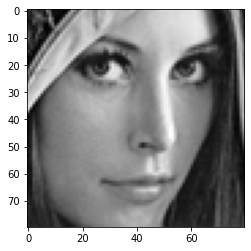

In [ ]:
temp_img = cv2.imread(uploaded_file_name2, 0)    # 画像ファイルを読み込む．
plt.imshow(temp_img, cmap = "gray")              # 読み込んだ画像の描画．

読み込んだ画像の構成を確認してみましょう．下記のプログラムで，画像のサイズ，画像の[0, 0]の輝度値(画素値)，画像の全ピクセルの輝度値(画素値)をPrintすることができます．これらの情報を駆使してチュートリアルを進めていきます．

In [ ]:
print("画像のサイズ\t\t：\t{0}\n".format(temp_img.shape))    # 画像のサイズ．
print("画像[0, 0]の濃度値\t：\t{0}\n".format(temp_img[0,0])) # 画像の[0, 0]の輝度値(画素値)．
print("画像全ピクセルの濃度値\t：\n{0}\n".format(temp_img))  # 全ピクセルの輝度値(画素値)．

画像のサイズ		：	(80, 80)

画像[0, 0]の濃度値	：	62

画像全ピクセルの濃度値	：
[[ 62  64  82 ... 156  79  47]
 [ 59  54  87 ... 164  94  54]
 [ 59  52  68 ... 163 105  55]
 ...
 [ 59  56  58 ...  77  63  80]
 [ 63  54  61 ...  77  65  82]
 [ 61  59  62 ...  82  70  85]]



## 2. テンプレートマッチングによるパターン検出

ダウンロードした「lenna.bmp」の画像に対して，テンプレートマッチングを行うことで，lennaの顔を検出します．このとき，テンプレートマッチングに使用するlennaの顔のテンプレート画像は「lenna_face.bmp」を使用します．

<br>

ここでは，2つの画像の相違度である$R_{SAD}$を下記のように算出していきます．このとき，$Input(i,j)$は入力画像の輝度値(画素値)，$Template(i,j)$はテンプレート画像の輝度値(画素値)，MとNはそれぞれテンプレート画像の横幅と縦幅を表しています．

\begin{equation}
  R_{SAD} = \sum_{j=0}^{N-1} \sum_{i=0}^{M-1}| Input(i,j) - Template(i,j) |
\end{equation}

<br>

そして，入力画像に対してラスタースキャンを施し，$R_{SAD}$が最小の位置をマッチング座標として出力します．計算には時間がかかるので気長に待ちましょう．

※ OpenCVなどの画像処理ライブラリは使用しないで実装していきます．

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


最もマッチしている点：106，112
相違度：0


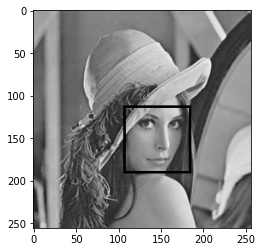

In [ ]:
# 【補足】最初に，最小の相違度R_SADの発見のために，取り得る最大値を代入しておく．
#         80 × 80のテンプレート画像に対して，差が全て256であった場合が相違度R_SADの最大値．
min_value = 80 * 80 * 256

# 相違度R_SADの算出．
# 【補足】相違度R_SADは「入力画像サイズ - テンプレート画像サイズ」の位置までの算出が可能．
#         そのため，ラスタスキャンは「入力画像サイズ - テンプレート画像サイズ」までの探索．
for x in range(256-80):
  for y in range(256-80):

    # 【補足】画素(x, y)に対する相違度R_SADの算出．
    local_value = 0
    for j in range(80):
      for i in range(80):

        # 【補足】画素(x, y)に対する相違度R_SADの絶対値項の算出．
        absolute = img[y+j][x+i] - temp_img[j][i]
        absolute = absolute if 0 < absolute else -absolute
        local_value += absolute
    
    # 【補足】最小の相違度R_SADの発見．
    if(local_value < min_value):
      min_value = local_value
      min_x = x
      min_y = y
  
print("最もマッチしている点：%d，%d" % (min_x, min_y))
print("相違度：%d" % min_value)

# 相違度R_SADが最小の位置をバウンディングボックスで可視化．
# 【補足】バウンディングボックスの太さを3画素分用意(任意の値で可)．
for j in range(80):
  for i in range(3):

    # 【補足】バウンディングボックスを黒色(輝度値0)で表現．
    img[min_y+i][min_x+j] = 0
    img[min_y+79-i][min_x+j] = 0
    img[min_y+j][min_x+i] = 0
    img[min_y+j][min_x+79-i] = 0
	
# テンプレートマッチング後の画像の描画．
plt.imshow(img, cmap = "gray")